# COGS 108 - The Grader Project

# Overview

There are several different factors that can influence a student’s performance in school. In our project, we would like to identify key factors that have an influence on students’ performance on exams. From our background research, we noticed that minorities representation in colleges are scarce. The United States is known for providing opportunities to everyone, however, there are many that are being left behind. Therefore, it is very important to determine these factors so that they can be address and everyone can have the same chances.

# Group Members and IDs

- **Sihan Sun** A14744985<br>
- **Lisa Zhou** A13646419<br>
- **Elizabeth Guerrero** A12919500<br>
- **Marlon Cortez** A14604525<br>
- **Cesar Hernandez Monsivais** A15013827<br>
- **Justin Chen** A12818909<br>

# Research Question

What are the key factors that can influence student performance in school?

## Background and Prior Work

Student performance is constantly being analyzed in order to ensure that the students are prepared for the future. There are various factors that have contributed to students’ performance on exams. Some factors have been found within schools, such as the teacher- student interaction[1] and the level of school resources[2]. However, others are grounded deeply within the communities students come from. Factors such as the students’ socioeconomic status[3] and demographic[4] have been persisted over several studies previously done. 

References and Similar Works (include links):
- 1) Assesing the Effects of School Resources on Student Performance https://journals.sagepub.com/doi/abs/10.3102/01623737019002141
- 2) The structure of Classroom Events and their Consequences for Student Performance
https://eric.ed.gov/?id=ED216557
- 3) Social-Emotional Factors Affecting Achievement Outcomes among disadvantaged Students: 
Closing  the Achievement Gap
https://www.tandfonline.com/doi/abs/10.1207/S15326985EP3704_1
- 4) Factors Affecting Students’ Quality of Academic Performance: A case of secondary school level
http://pu.edu.pk/images/journal/iqtm/PDF-FILES/01-Factor.pdf

# Hypothesis

Before analyzing the data, we hypothesize that the following factors will influence a student's performance on exams:

- 1) Parents’ support
- 2) School resources (funding)
- 3) Motivation (interest in pursuing higher education)
- 4) Participation in extracurricular activities
- 5) Socio-economic background
- 6) Demographic (in terms of location of the school)
- 7) Structure of classrooms
- 8) Romantic relationship

# Dataset(s)

### Dataset One
- Dataset Name:  Students' Academic Performance Dataset
- Link to the dataset: https://www.kaggle.com/aljarah/xAPI-Edu-Data
- Number of observations: 480

This dataset mainly contains the student's academic perfomance with various family factors including "mainly responsible family member", "parent participation in school survey", "the Degree of parent satisfaction from school".

### Dataset Two
- Dataset Name:  Students Performance in Exams
- Link to the dataset: https://www.kaggle.com/spscientist/students-performance-in-exams#StudentsPerformance.csv
- Number of observations: 1000

This dataset contains the information of the relationship between the academic performance of a student's math/reading/writing scores and various other factors including the parent education level.

### Dataset Three
- Dataset Name:  Student Performance Data Set
- Link to the dataset: https://archive.ics.uci.edu/ml/datasets/student+performance
- Number of observations: 649

This dataset mainly contains the student's academic perfomance with various family factors including "father education", "mother education", "father job", "mother job", "family size", and "family relationship", "whether parent live together or apart".

### Dataset Four
- Dataset Name:  Data Science for Good: PASSNYC
- Link to the dataset: https://www.kaggle.com/passnyc/data-science-for-good
- Number of observations: 1272

This data set contains data of New York's public schools from the 3rd grade to the 8th grade in ELA and Mathematics test scores for all students. The dataset also breaks down the test scores into different categories such as whether the students are at an ecoconomic disadvantage or not. The dataset is further broken down by race into white, asian, hispanic, multiracial and black. Apart from providing test scores, it provides a look at some factors that play a huge part in how students score in tests. Some of the factors provided are teacher involvement, family encouragement, and their economic status.

### Dataset Five
- Dataset Name:  NYC School Quality Reports: K-8, 2014-2016
- Link to the dataset: https://www.kaggle.com/verley/nyc-school-quality-reports-k8-20142016
- Number of observations: 3790

This data set contains public data from NYC's Department of Education of multiple schools and the academic performance of 4th and 5th grade English and math peformance scores, as well as factors such as race, economic need, and teacher support.

# Setup

### Import Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import patsy
import statsmodels.api as smapi

# Data Cleaning

## Dataset One

### Description

Since we don't care about identifying characteristics (such as the gender, the nationality, the place of birth, student's education level, grade the student belongs to, the course topic, which school year the student belongs to, and the class the student is taking) we are going to drop these fields from our table to make the table clearer as well as preserve anonymity.

In [2]:
# read the student data from csv file
df1 = pd.read_csv('./Family/parentResponsible.csv')
df1=df1.drop(labels=['gender', 'NationalITy', 'PlaceofBirth', 'StageID' ,'SectionID', 'GradeID', 'Topic','Semester','Class'], axis=1)

Apply transform so that:  
If father is the mainly responsible family member, then relationship is 0.  
If mother is the mainly responsible family member, then relationship is 1.  

In [3]:
def replace_relation_with_number(x):
    if x == 'Father':
        return 0
    else:
        return 1
df1['Relation'] = df1['Relation'].apply( replace_relation_with_number)

Apply transform so that:  
If parents answer the survey, then ParentAnsweringSurvey is set to 1, else set to 0.

In [4]:
def replace_survey_with_number(x):
    if x == 'Yes':
        return 1
    else:
        return 0
df1['ParentAnsweringSurvey'] = df1['ParentAnsweringSurvey'].apply( replace_survey_with_number);

Apply transform so that: 
If student absense days is above 7 days, then StudentAbsenceDays is set to 1, else set to 0.

In [5]:
def replace_absence_with_number(x):
    if x == 'Under-7':
        return 0
    else:
        return 1
df1['StudentAbsenceDays'] = df1['StudentAbsenceDays'].apply( replace_absence_with_number);

### Data Visualization

In [6]:
df1.describe()

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.397917
std,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.489979
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000
50%,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,0.000000
75%,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000
max,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000


### Usage
Since student grades in this dataset come from different class topics, it is unreasonable to compare the grade directly. To overcome this issue, we treat the academic performance as a more complex meaning rather than the grade. That is, we would like to analyze the relationship between student's effort towards studying and the family factor. For example, we will analyze the relationship between how many times the students raised hands and who is the family member that is responsible for the student's study habits.

## Dataset Two

### Description

Since we don't care about the gender, race, lunch, or test preparation, we are going to drop these fields from the dataset to preserve anonymity.

In [7]:
# read the student data from csv file
df2 = pd.read_csv('./Family/parentEducationLevel.csv')
df2 = df2.drop(labels=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], axis=1)

Apply transform so that:  
high school degree is transformed to 1. 
some college degree is transformed to 2.  
associate degree is transformed to 3.  
bachelor's degree is transformed to 4.  
master degree is transformed to 5.  

In [8]:
def replace_degree_with_number(x):
    if x == 'some high school':
        return 0
    elif x == 'high school':
        return 1
    elif x == 'some college':
        return 2
    elif x == 'associate\'s degree':
        return 3
    elif x == 'bachelor\'s degree':
        return 4
    elif x == 'master\'s degree':
        return 5
    else:
        print(x)
        return 6
df2['parental level of education'] = df2['parental level of education'].apply( replace_degree_with_number);

### Data Visualization

In [9]:
df2.describe()

,parental level of education,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.054000,67.080000,69.796000,68.716000
std,1.525586,14.805229,14.244483,15.102564
min,0.000000,17.000000,29.000000,28.000000
25%,1.000000,57.000000,60.000000,57.000000
50%,2.000000,67.000000,69.000000,69.000000
75%,3.000000,77.000000,80.000000,80.000000
max,5.000000,100.000000,100.000000,100.000000


### Usage
As the grades in this dataset are categorized into different subjects rather than combined into one, we will use the grade as the academic performance in this dataset and analyze the relationship between parent level education and grades of different subjects.

## Dataset Three

### Description

This dataset mainly contains the student's academic perfomance with various family factors including "father education", "mother education", "father job", "mother job", "family size", and "family relationship", "whether parent live together or apart". We will drop all other factors to make the table more concise and preserve anonymity.

In [10]:
# read the student data from csv file
df3 = pd.read_csv('./student/student-por.csv', sep=';')
df3=df3.drop(labels=['school', 'sex', 'age', 'address','nursery', 'school', 'address','guardian', 'failures', 'health', 'romantic'], axis=1)
df3=df3.drop(labels=['reason', 'paid', 'internet', 'schoolsup'], axis=1)

Apply transform so that: 
Family size > 3 will transform to 1.
Family size <= 3 will transform to 0.

In [11]:
def replace_famsize_with_number(x):
    if x == 'GT3':
        return 1
    else:
        return 0
df3['famsize'] = df3['famsize'].apply( replace_famsize_with_number);

Apply transform so that:  
family support is yes will transform to 1. 
family support is no will transform to 0. 

In [12]:
def replace_famsup_with_number(x):
    if x == 'yes':
        return 1
    else:
        return 0
df3['famsup'] = df3['famsup'].apply( replace_famsup_with_number);

Apply transform so that: 
parents are apart will transform to 0.   
parents are together will transform to 0. 

In [13]:
def replace_pstatus_with_number(x):
    if x == 'T':
        return 1
    else:
        return 0
df3['Pstatus'] = df3['Pstatus'].apply( replace_pstatus_with_number);

### Data Visualization

In [14]:
df3.describe()

,famsize,Pstatus,Medu,Fedu,traveltime,studytime,famsup,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.704160,0.876733,2.514638,2.306626,1.568567,1.930663,0.613251,3.930663,3.180277,3.184900,1.502311,2.280431,3.659476,11.399076,11.570108,11.906009
std,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,0.487381,0.955717,1.051093,1.175766,0.924834,1.284380,4.640759,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,10.000000,10.000000,10.000000
50%,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Usage
We will use this dataset to analyze the relationship between the grade and the factors of father education, mother education, family size, family support, family relationship.

## Dataset Four
### Description

This data set contains data of New York's public schools from the 3rd grade to the 8th grade in ELA and Mathematics test scores for all students. The dataset also breaks down the test scores into different categories such as whether the students are at an ecoconomic disadvantage or not. The dataset is further broken down by race into white, asian, hispanic, multiracial and black. Apart from providing test scores, it provides a look at some factors that play a huge part in how students score in tests. Some of the factors provided are teacher involvement, family encouragement, and their economic status.

In [15]:
#importing dataset
df_school_explorer = pd.read_csv('Data/Second Set/2016 School Explorer.csv')

In [16]:
#Dropping columns that are not needed
df_school_explorer = df_school_explorer.drop(['Latitude','Longitude','Address (Full)','School Name','Adjusted Grade','New?', 'Other Location Code in LCGMS'],axis=1)
df_school_explorer = df_school_explorer.drop(['SED Code','Location Code','District','City','Zip'],axis =1)

In [17]:
#Dropping nan values and reindexing
df_school_explorer.columns
df_school_explorer.dropna(inplace=True)
df_school_explorer = df_school_explorer.reset_index(drop=True)

In [18]:
print("The shape of the dataframe " + str(df_school_explorer.shape))

The shape of the dataframe (795, 149)


### Usage
We will use this dataset to compare how much the economic status affects student test scores and check if there is any relationship trend between the races and how well they score.

## Dataset Five
### Description

This data set contains public data from NYC's Department of Education of multiple schools and the academic performance of 4th and 5th grade English and math peformance scores, as well as factors such as race, economic need, teacher experience, and attendance rates. Other factors that can be used to identify schools are removed in order to preserve anonimity.

In [19]:
#importing dataset
df_SQR = pd.read_csv('./Data/First Set/SQR.csv')

In [20]:
#cleaning data
df_SQR = df_SQR.filter(['Economic Need Index',
            'Average Grade 4 English Proficiency',
            'Average Grade 4 Math Proficiency',
            'Enrollment',
            'Percent Asian',
            'Percent Black',
            'Percent Hispanic',
            'Percent White',
            'Percent of teachers with 3 or more years of experience',
            'Quality Review - How well do teachers work with each other?',
            'Rigorous Instruction - Percent Positive',
            'Strong Family-Community Ties - Percent Positive',
            'Supportive Environment - Percent Positive'
            ])

In [21]:
#Dropping NaN values and the showing final shape of the data
df_SQR = df_SQR.dropna()
print("The shape of the dataframe " + str(df_SQR.shape))


The shape of the dataframe (1104, 13)


### Usage

We will use this dataset to compare how external factors such as race, economic need, and teacher support affect student scores.

# Data Analysis & Results

## Part 1: Which parental figure plays a more important role in promoting students' study activities?

Our goal in this part is to analyze: Will the student be more inclined to study if the mother is mainly responsible for the student's education or if father is mainly responsible for the student's education?

#### First of all, let's take a look of all the learning activities we would like to analyze.   

### Hands Raised
The first one is the number of times that the student raise his/her hand.

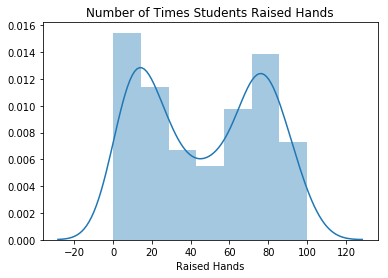

In [22]:
ax = plt.axes()
sns.distplot(df1['raisedhands'], axlabel="Raised Hands")
ax.set_title("Number of Times Students Raised Hands")
plt.show()

By plotting out the data, we can see that the data does not fit into the normal distribution nor poisson distribution. The number of raised hands of a students tends to divide into two opposing extremes. Student's are either raising their hands all the time or never raise their hands at all.

### Discussions
The second is the how many times the student participate in discussion groups.

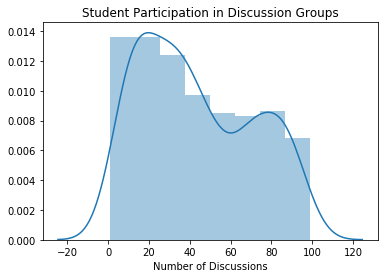

In [23]:
ax = plt.axes()
sns.distplot(df1['Discussion'], axlabel="Number of Discussions")
ax.set_title("Student Participation in Discussion Groups")
plt.show()

As we can see from the plot, in general, as the number of times that the student participate in the discussion increases, the percentage of those students decreases, demonstrating an inverse relationship between the two and fitting into the exponential distribution. However, due to the limited size ofthe dataset, the distribution does not fit perfectly.

### Announcements
The third one is how many times each student checks the new announcements.

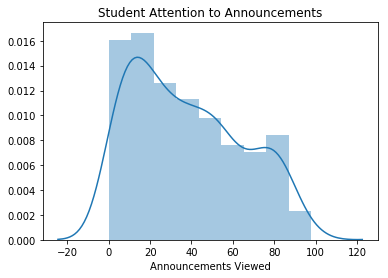

In [24]:
ax = plt.axes()
sns.distplot(df1['AnnouncementsView'], axlabel="Announcements Viewed")
ax.set_title("Student Attention to Announcements")
plt.show()

As we can see, it also fits into the exponential distribution.

#### If we compare the mean numbers of the previous three activities between the students with father as the mainly responsible parent and students with mother as the mainly respomsible parent, we can get the following graph.

In [25]:
announcements_view_mean = np.asarray(df1.groupby('Relation', as_index=False)['AnnouncementsView'].mean())
discussion_mean = np.asarray(df1.groupby('Relation', as_index=False)['Discussion'].mean())
raised_hands_mean = np.asarray(df1.groupby('Relation', as_index=False)['raisedhands'].mean())

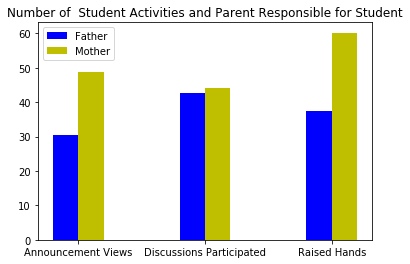

In [26]:
N = 3
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, (announcements_view_mean[0][1],discussion_mean[0][1], raised_hands_mean[0][1]) , width, color='b', bottom=0)

p2 = ax.bar(ind + width, (announcements_view_mean[1][1],discussion_mean[1][1], raised_hands_mean[1][1]), width,
            color='y', bottom=0)

ax.set_title('Number of  Student Activities and Parent Responsible for Student')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Announcement Views', 'Discussions Participated', 'Raised Hands'))

ax.legend((p1[0], p2[0]), ('Father', 'Mother'))
ax.autoscale_view()

plt.show()

We can see from the plot that for all the study activities we measured: number of times that the student checked class announcements, number of times that the student participated in discussion, and number of times that the student raised hands, students with mother mainly responsible for his/her study do better than students with father mainly responsible for his/her study.

#### Let's take a deep look into each study activities using box plot.   

Text(0.5, 0, "Parent mainly responsible for the student's study")

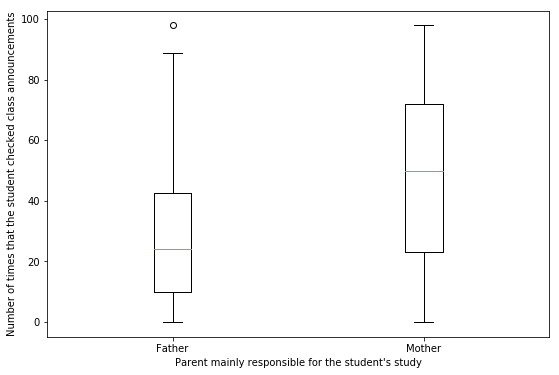

In [27]:
announcements_view_father = np.asarray(df1[df1['Relation'] == 0]['AnnouncementsView'].values)
announcements_view_mother = np.asarray(df1[df1['Relation'] == 1]['AnnouncementsView'].values)
announcements_view_plot = [announcements_view_father, announcements_view_mother]
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(announcements_view_plot)
ax.set_xticklabels(['Father', 'Mother'])
ax.set_ylabel('Number of times that the student checked class announcements')
ax.set_xlabel('Parent mainly responsible for the student\'s study')

Text(0.5, 0, "Parent mainly responsible for the student's study")

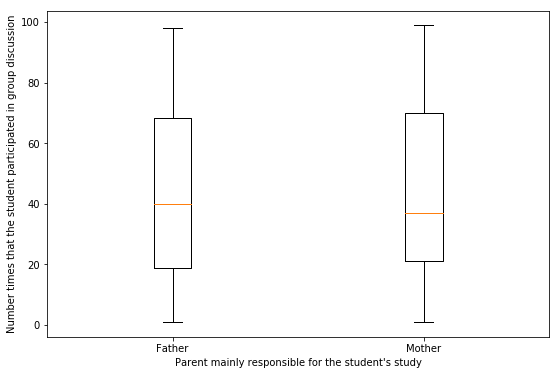

In [28]:
discussion_father = np.asarray(df1[df1['Relation'] == 0]['Discussion'].values)
discussion_mother = np.asarray(df1[df1['Relation'] == 1]['Discussion'].values)
discussion_view_plot = [discussion_father, discussion_mother]
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(discussion_view_plot)
ax.set_xticklabels(['Father', 'Mother'])
ax.set_ylabel('Number times that the student participated in group discussion')
ax.set_xlabel('Parent mainly responsible for the student\'s study')

Text(0.5, 0, "Parent mainly responsible for the student's study")

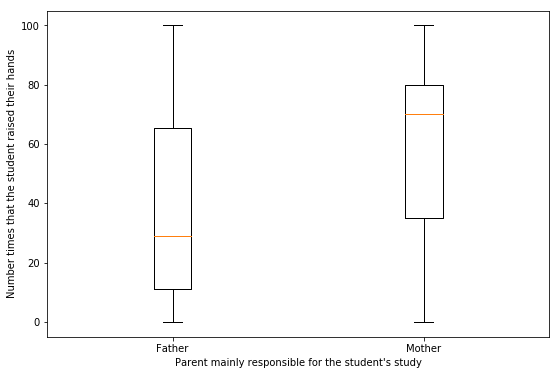

In [29]:
raised_hands_father = np.asarray(df1[df1['Relation'] == 0]['raisedhands'].values)
raised_hands_mother = np.asarray(df1[df1['Relation'] == 1]['raisedhands'].values)
raised_hands_view_plot = [raised_hands_father, raised_hands_mother]
fig = plt.figure(1, figsize=(9,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(raised_hands_view_plot)
ax.set_xticklabels(['Father', 'Mother'])
ax.set_ylabel('Number times that the student raised their hands')
ax.set_xlabel('Parent mainly responsible for the student\'s study')

As we can see from the box plot, except the number of times that students participated in discussion (where there is minor difference), in terms of number of times that the student raised their hands and number of times the student checked announcements, there is a significant difference between mother-responsible students and father-responsible students. Mother-responsible students typically do better than father-responsible students.

**Therefore, based on the results above, we conclude that mother-responsible students are more likely to participate in learning activities than father-responsible students.**

## Part 2 Analysis based on parents education level and students' academic performance
Our goal in this part is to analyze whether parents' education level has a strong correlation to students' academic performance. To do so, we will use linear regression to fit the scatter plot.

First, let's take a look at the distribution of overall parent education level.

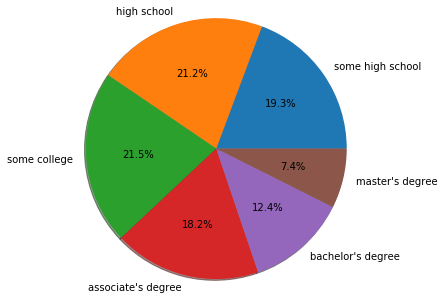

In [30]:
percentage_list = [len(df2[df2['parental level of education'] == i])/float( len(df2)) for i in range(6)]
level_list = ['some high school', 'high school',  'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
plt.pie(percentage_list, labels=level_list, autopct = '%1.1f%%', shadow=True, radius=2)
plt.show()

Then, we want to know what the average grade of each student is based on the parent's education level.

We use bar plots to show the average math/writing/reading scores in terms of parent education levels.

Text(0.5, 0, "Parents' Education Level")

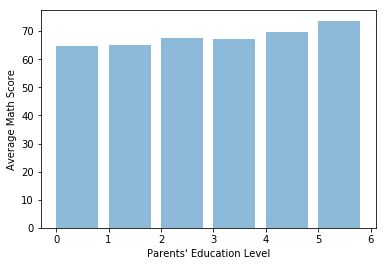

In [31]:
grade_avg_list = [df2[df2['parental level of education'] == i]['math score'].mean() for i in range(6)]
plt.bar([i for i in range(6)], grade_avg_list, align='edge', alpha=0.5)
plt.ylabel('Average Math Score')
plt.xlabel('Parents\' Education Level')

Text(0.5, 0, "Parents' Education Level")

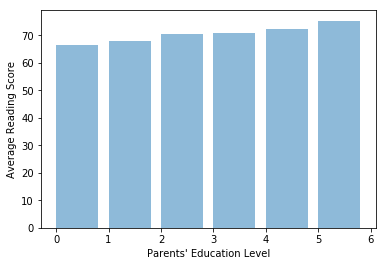

In [32]:
grade_avg_list = [df2[df2['parental level of education'] == i]['reading score'].mean() for i in range(6)]
plt.bar([i for i in range(6)], grade_avg_list, align='edge', alpha=0.5)
plt.ylabel('Average Reading Score')
plt.xlabel('Parents\' Education Level')

Text(0.5, 0, "Parents' Education Level")

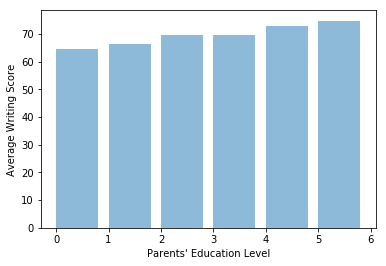

In [33]:
grade_avg_list = [df2[df2['parental level of education'] == i]['writing score'].mean() for i in range(6)]
plt.bar([i for i in range(6)], grade_avg_list, align='edge', alpha=0.5)
plt.ylabel('Average Writing Score')
plt.xlabel('Parents\' Education Level')

As we can see, as the parents' education level increase, the average math/reading/writing scores also increases, suggesting some correlation between parents' education level and students' academic performance.

To further analyze such correlation, we would like to use the linear regression to fit the data.  
We want to know the coeff for the linear equation grade = a*parent_education_level+b for math/reading/writing score

Math score correlation:

In [34]:
df2['paredu'] = df2['parental level of education']
df2['math_score'] = df2['math score']
outcome, predictor = patsy.dmatrices('math_score ~ paredu', df2)
model = smapi.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     23.25
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.64e-06
Time:                        16:46:51   Log-Likelihood:                -4101.9
No. Observations:                1000   AIC:                             8208.
Df Residuals:                     998   BIC:                             8218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.0723      0.777     82.478      0.0

Reading score correlation:

In [35]:
df2['reading_score'] = df2['reading score']
outcome, predictor = patsy.dmatrices('reading_score ~ paredu', df2)
model = smapi.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     31.41
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           2.71e-08
Time:                        16:46:51   Log-Likelihood:                -4059.3
No. Observations:                1000   AIC:                             8123.
Df Residuals:                     998   BIC:                             8132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.4461      0.744     89.255      0.0

Writing score correlation:

In [36]:
df2['writing_score'] = df2['writing score']
outcome, predictor = patsy.dmatrices('writing_score ~ paredu', df2)
model = smapi.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     43.99
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           5.40e-11
Time:                        16:46:52   Log-Likelihood:                -4111.7
No. Observations:                1000   AIC:                             8227.
Df Residuals:                     998   BIC:                             8237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.5381      0.785     82.264      0.0

**We can see from the linear regression result that all of the three subjects (math score, reading score, writing score) are correlated to the parents' level of education. Among all three fields, the correlation between writing score and parents' level of education are the strongest (2.0)**

### Analysis of Correlation between Parent Education Level and Student Scores

It would be beneficial to analyze how a father's education level and a mother's education level have different influences on student academic performance. Therefore, we will use dataset three, which contains the the father & mother education level and their final grades.

First, we can test the correlation between father & mother education levels and students' grades.

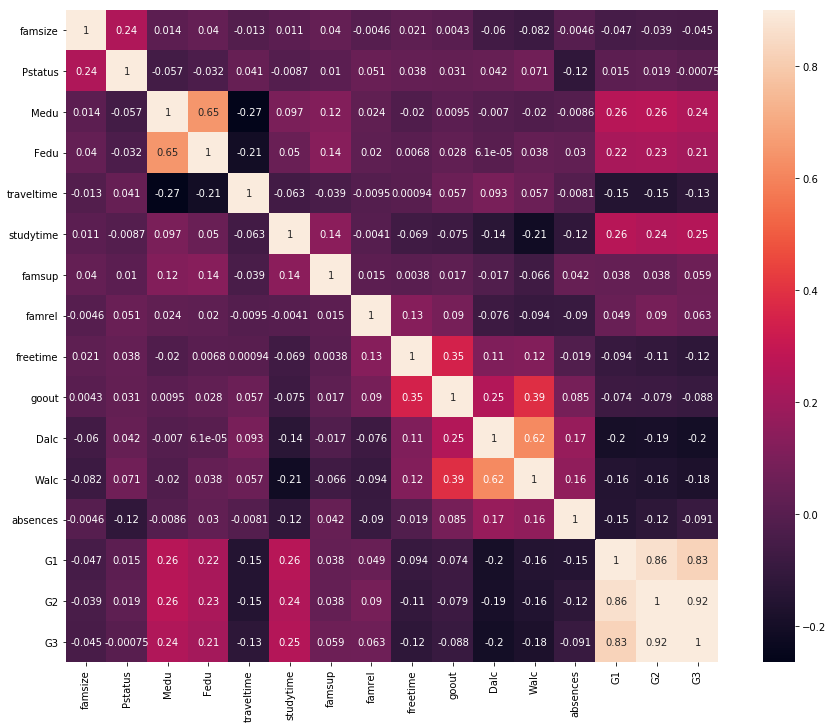

In [37]:
correlation = df3.corr()
plt.subplots(figsize=(16,12))
sns.heatmap(correlation, vmax=0.9, square=True, cbar=True, annot=True)

As we can see, among all the factors, father / mother education level (Fedu and Medu) are the two top factors that have positive influence on student's grade (G1, G2,G3), which further substantiate the correlation between parent education level and students' academic performance. Interestingly, mother education seems to have higher influence than father's education.

To further analyze/substantiate the correlation between father and mother education level and student final grades separately, let us first take a look at the general changing pattern of the final grade G3 with the increase of the education level of mother / father.

#### Grade Distribution in Relation to Mother Education Level

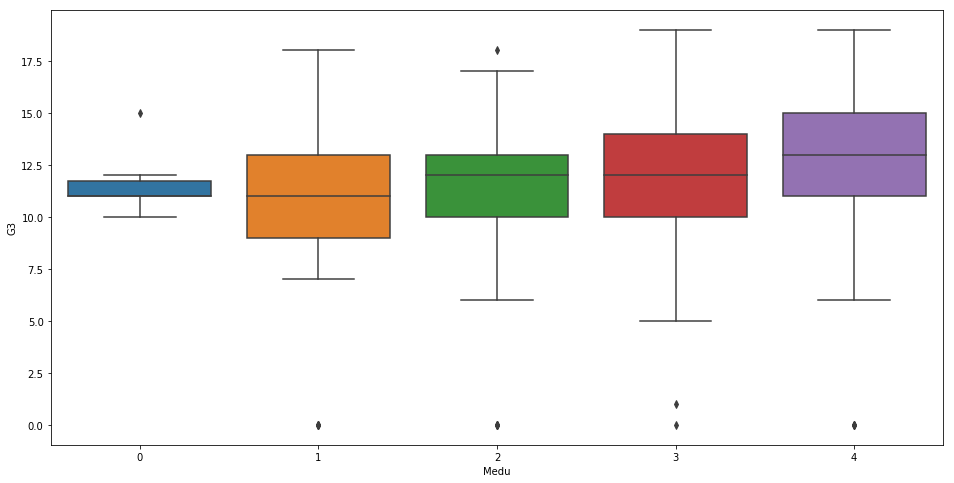

In [38]:
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df3[['Medu', 'G3']], x='Medu', y='G3')

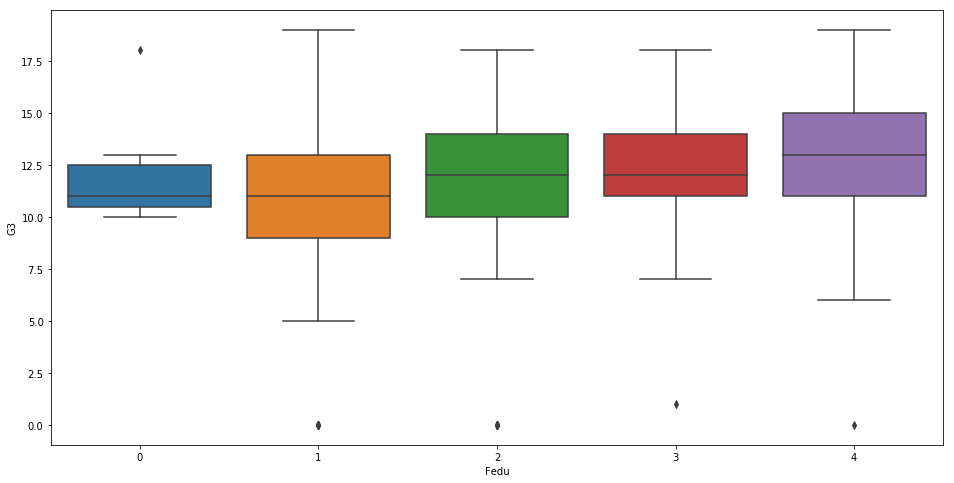

In [39]:
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df3[['Fedu', 'G3']], x='Fedu', y='G3')

We can see that for both parents, as the education level increases, there is also a general trend that final grades increase.

To further test how does correlate to the combination of father and mother education levels we combine the father education and mother education level and use linear regression model to fit the data so that

#### G1 = a x MotherEducation + b x FatherEducation + c.
#### G2 = a x MotherEducation + b x FatherEducation + c.
#### G3 = a x MotherEducation + b x FatherEducation + c.

In [40]:
outcome, predictor = patsy.dmatrices('G1 ~ Medu + Fedu', df3)
model = smapi.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     25.04
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           3.35e-11
Time:                        16:46:57   Log-Likelihood:                -1551.6
No. Observations:                 649   AIC:                             3109.
Df Residuals:                     646   BIC:                             3123.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6613      0.269     35.964      0.0

In [41]:
outcome, predictor = patsy.dmatrices('G2 ~ Medu + Fedu', df3)
model = smapi.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     G2   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     26.10
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.26e-11
Time:                        16:46:58   Log-Likelihood:                -1589.2
No. Observations:                 649   AIC:                             3184.
Df Residuals:                     646   BIC:                             3198.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6851      0.285     34.021      0.0

In [42]:
outcome, predictor = patsy.dmatrices('G3 ~ Medu + Fedu', df3)
model = smapi.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     21.77
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           7.12e-10
Time:                        16:46:58   Log-Likelihood:                -1660.3
No. Observations:                 649   AIC:                             3327.
Df Residuals:                     646   BIC:                             3340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9791      0.318     31.417      0.0

We can see that in all three cases, the coefficient of the mother education level is significantly higher than the coeff of the father education level. If we take the mean value, the relationship between the grade and the father education level & mother education level is

#### G = 0.5088 x MotherEducation + 0.2472 x FatherEducation + 9.7751.

The results suggest that mother's education level has a higher influence on the students' grade than father's education level, which is same as what is shown on the correlation map.

# Part 3: Analysis between level of family support and student grades
Our goal in this part is to analyze: will students perform better in school if they have more family support?
First, we will get the mean of each grade and then separate it based on whether the student has family support or does not have family support to get the following graph.

In [43]:
G1_mean = np.asarray(df3.groupby('famsup', as_index=False)['G1'].mean())
G2_mean = np.asarray(df3.groupby('famsup', as_index=False)['G2'].mean())
G3_mean = np.asarray(df3.groupby('famsup', as_index=False)['G3'].mean())

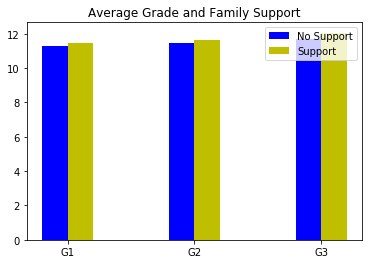

In [44]:
N = 3
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.2         # the width of the bars
p1 = ax.bar(ind, (G1_mean[0][1],G2_mean[0][1], G3_mean[0][1]) , width, color='b', bottom=0)

p2 = ax.bar(ind + width, (G1_mean[1][1],G2_mean[1][1], G3_mean[1][1]), width,
            color='y', bottom=0)

ax.set_title('Average Grade and Family Support')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3'))

ax.legend((p1[0], p2[0]), ('No Support', 'Support'))
ax.autoscale_view()

plt.show()

From this plot, we can see that students with family support have a higher average grade than students with no support. 

Next, we want to find out if the level of a student's relationship with their family, on a scale from 1 to 5 where 1 is the weak and 5 is strong, will have an effect on their grades.

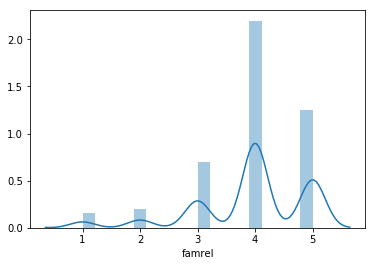

In [45]:
sns.distplot(df3['famrel'])

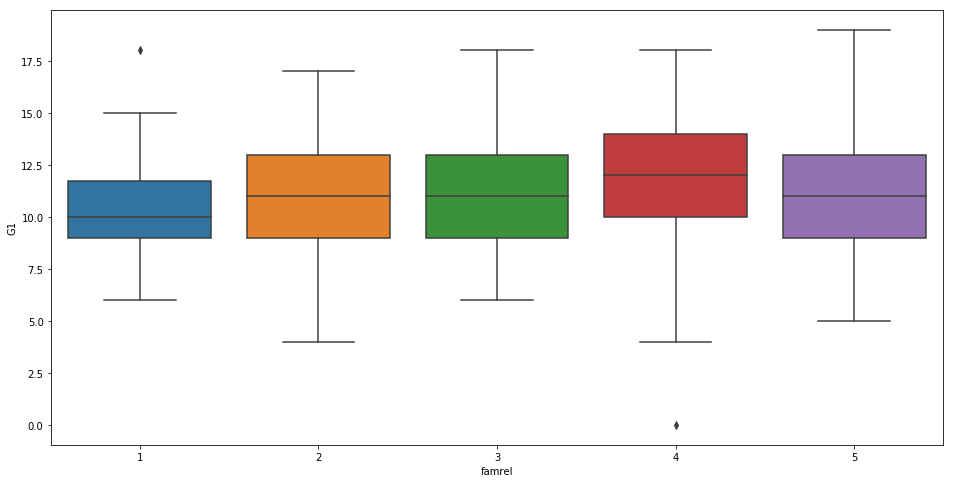

In [46]:
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df3[['famrel', 'G1']], x='famrel', y='G1')

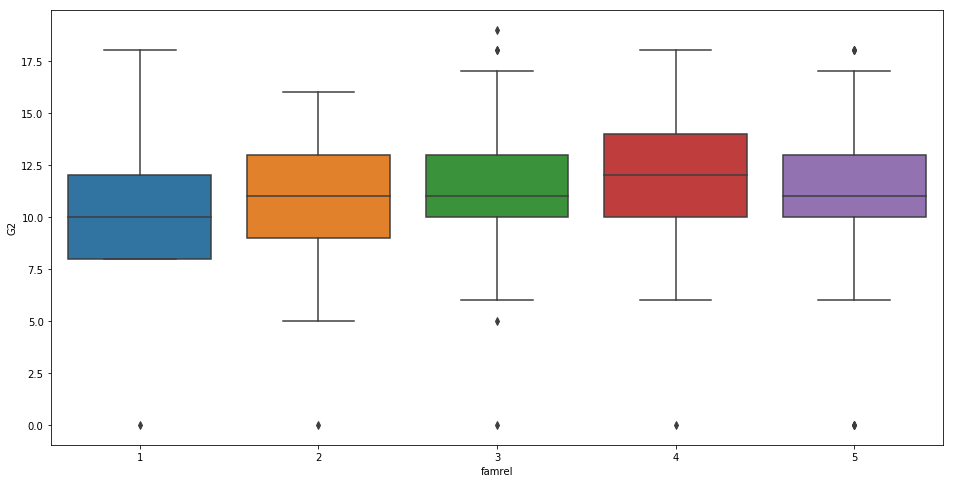

In [47]:
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df3[['famrel', 'G2']], x='famrel', y='G2')

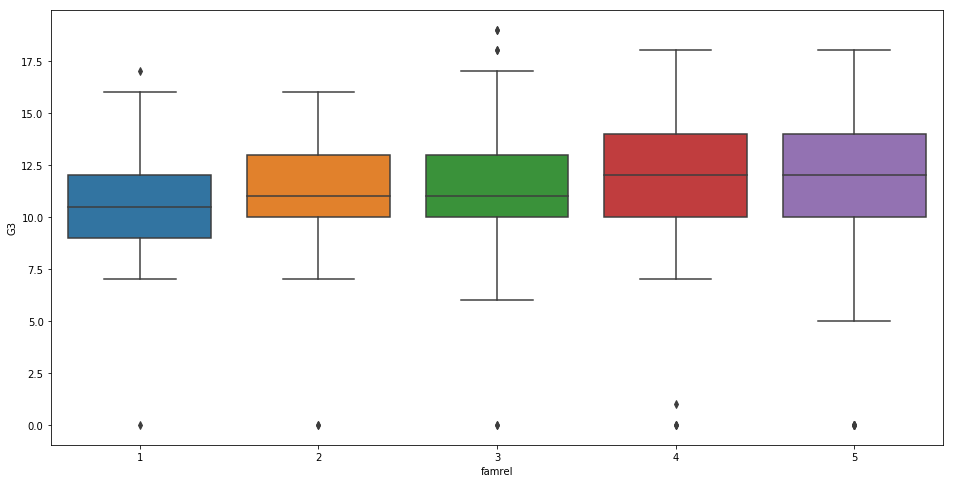

In [48]:
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df3[['famrel', 'G3']], x='famrel', y='G3')

These box plots suggest that level of family relationship may have an effect on student performance such that the greater the relationship the better the student will perform on exams. But in each plot, that trend does not necessarily apply to students who have a level 5 family relationship. This could mean that level of family relationship may have an effect up to a certain point.

## Part 4: Economic Need, School Income and Race
The goal for this part is to determine if test scores are affected by economic need, school income and the race of the students. We will be looking at how a larger population of certain races affects school incomes and how that school and income need will affect students. 

In [49]:
economic_need_index = df_school_explorer['Economic Need Index']
school_income_estimate = df_school_explorer['School Income Estimate']
print("Length of economic need index " + str(len(economic_need_index)))
print("Length of school income estimate " + str(len(school_income_estimate)))

Length of economic need index 795
Length of school income estimate 795


In [50]:
#REMOVING ALL THE DOLLAR SIGNS and empty space and replacing the , with blank spots
for i in df_school_explorer.index:
    df_school_explorer.replace(df_school_explorer.loc[i,'School Income Estimate'], float(df_school_explorer.loc[i,'School Income Estimate'][1:-1].replace(',','')) ,inplace=True)    

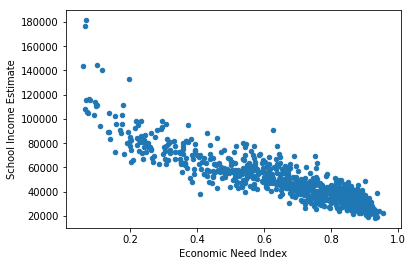

In [51]:
#Plot showing the relationship between the economic need and the estimated school income
df_school_explorer.plot(kind='scatter', x='Economic Need Index', y ='School Income Estimate')

#### Explanation:
From the above graph, it can be observed that there is a very clear correlation between economic need index and school incomes. The larger the economic need index is in the region the less money the schools tend to receive. The smaller the economic need index is in the region the more money, the school tends to receive. With more money, schools can have better teachers, tutoring sessions, more advanced technology such as better computers and ipads to make learning more interactive and fun, and an environment that promotes learning and encourages students to be the best they can be. Having this type of environment definitely benefits students not only as a whole but in their studies. 

### Functions for Analysis

In [52]:
def removing_percent_signs(race):
    '''Used for removing the percent signs'''
    for i in df_school_explorer.index:
        if isinstance(df_school_explorer.loc[i,race],str) ==True:
            df_school_explorer.replace(df_school_explorer.loc[i,race], df_school_explorer.loc[i,race].replace('%',''),inplace=True) 
def making_percent_into_int(race):
    '''Making percents into integer values'''
    for i in df_school_explorer.index:
        if isinstance(df_school_explorer.loc[i,race],str) ==True:
            df_school_explorer.replace(df_school_explorer.loc[i,race], int(df_school_explorer.loc[i,race]),inplace=True) 


## Economic Need vs Races

## Hispanic

In [53]:
#Identifying race
race = 'Percent Hispanic'
removing_percent_signs(race)

In [54]:
#Cleaning data for usage
making_percent_into_int(race)

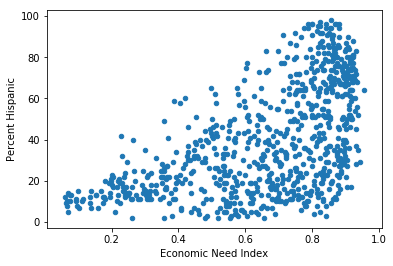

In [55]:
df_school_explorer.plot(kind='scatter', x='Economic Need Index', y ='Percent Hispanic')

#### Explanation:
From the graph, as the percentage of hispanic students increases there is a higher need for income. From previous background research, it was noted that schools and districts with larger percentages of hispanic students tend to have receive less money. Therefore, these schools are unable to promote student learning as well as other schools that might get a large income.  

## Asian

In [56]:
#identifying race
race1 = 'Percent Asian'
removing_percent_signs(race1)

In [57]:
#Cleaning Data
making_percent_into_int(race1)

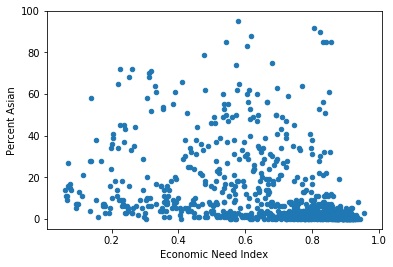

In [58]:
df_school_explorer.plot(kind='scatter', x='Economic Need Index', y ='Percent Asian')

#### Explanation:
From the graph, as the percentage of asian students increases the graph presents no significant correlation between the percentage of asian students and their economic need. 

## African American

In [59]:
race2 = 'Percent Black'
removing_percent_signs(race2)

In [60]:
making_percent_into_int(race2)

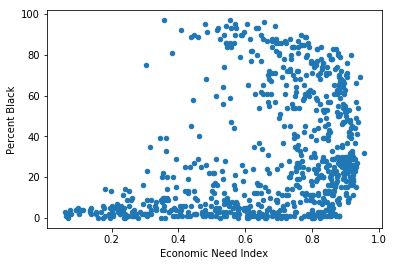

In [61]:
df_school_explorer.plot(kind='scatter', x='Economic Need Index', y ='Percent Black')

#### Explanation:
From the graph, it can be observed whether there is a low or high percentage of black students they economic need index tends to be high. Just like the Hispanic population, schools and districts which have larger populations of african american students tend to receive less money which impacts their learning environment and success as students.

## White

In [62]:
#Identifying race
race3 = 'Percent White'
removing_percent_signs(race3)

In [63]:
#Cleaning Data
making_percent_into_int(race3)

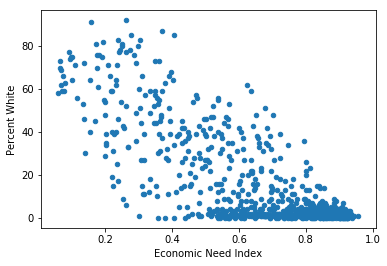

In [64]:
df_school_explorer.plot(kind='scatter', x='Economic Need Index', y ='Percent White')

#### Explanation:
From the graph, it can be observed that higher percentages of white students have a stable and lower economic need. As the economic need increases the percentage of white students falls. This signals that the white students are better off financially. 

In [65]:
#Setting up data for plotting 

asian_student = sum(df_school_explorer['Grade 3 Math 4s - Asian or Pacific Islander'])
white_student = sum(df_school_explorer['Grade 3 Math 4s - Asian or Pacific Islander'])
black_student = sum(df_school_explorer['Grade 3 Math 4s - Black or African American'])
hispanic_student = sum(df_school_explorer['Grade 3 Math 4s - Hispanic or Latino'])

asian_student1 = sum(df_school_explorer['Grade 4 Math 4s - Asian or Pacific Islander'])
white_student1 = sum(df_school_explorer['Grade 4 Math 4s - Asian or Pacific Islander'])
black_student1 = sum(df_school_explorer['Grade 4 Math 4s - Black or African American'])
hispanic_student1 = sum(df_school_explorer['Grade 4 Math 4s - Hispanic or Latino'])

asian_student2 = sum(df_school_explorer['Grade 5 Math 4s - Asian or Pacific Islander'])
white_student2 = sum(df_school_explorer['Grade 5 Math 4s - Asian or Pacific Islander'])
black_student2 = sum(df_school_explorer['Grade 5 Math 4s - Black or African American'])
hispanic_student2 = sum(df_school_explorer['Grade 5 Math 4s - Hispanic or Latino'])

asian_student3 = sum(df_school_explorer['Grade 6 Math 4s - Asian or Pacific Islander'])
white_student3 = sum(df_school_explorer['Grade 6 Math 4s - Asian or Pacific Islander'])
black_student3 = sum(df_school_explorer['Grade 6 Math 4s - Black or African American'])
hispanic_student3 = sum(df_school_explorer['Grade 6 Math 4s - Hispanic or Latino'])

asian_student4 = sum(df_school_explorer['Grade 7 Math 4s - Asian or Pacific Islander'])
white_student4 = sum(df_school_explorer['Grade 7 Math 4s - Asian or Pacific Islander'])
black_student4 = sum(df_school_explorer['Grade 7 Math 4s - Black or African American'])
hispanic_student4 = sum(df_school_explorer['Grade 7 Math 4s - Hispanic or Latino'])

asian_student5 = sum(df_school_explorer['Grade 8 Math 4s - Asian or Pacific Islander'])
white_student5 = sum(df_school_explorer['Grade 8 Math 4s - Asian or Pacific Islander'])
black_student5 = sum(df_school_explorer['Grade 8 Math 4s - Black or African American'])
hispanic_student5 = sum(df_school_explorer['Grade 8 Math 4s - Hispanic or Latino'])

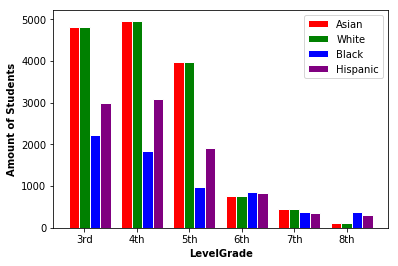

In [66]:
barWidth = 0.20

#bar heights 
asian_bar = [asian_student,asian_student1,asian_student2,asian_student3,asian_student4,asian_student5]
white_bar = [white_student,white_student1,white_student2,white_student3,white_student4,white_student5]
black_bar = [black_student,black_student1,black_student2,black_student3,black_student4,black_student5]
hispanic_bar = [hispanic_student,hispanic_student1,hispanic_student2,hispanic_student3,hispanic_student4,
                hispanic_student5]

#set position of bar on x axis
r1 = np.arange(len(asian_bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, asian_bar, color='red', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r2, white_bar, color='green', width=barWidth, edgecolor='white', label='White')
plt.bar(r3, black_bar, color='blue', width=barWidth, edgecolor='white', label='Black')
plt.bar(r4, hispanic_bar, color='purple', width=barWidth, edgecolor='white', label='Hispanic')

plt.xlabel('LevelGrade', fontweight='bold')
plt.ylabel('Amount of Students', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(asian_bar))], ['3rd', '4th', '5th', '6th','7th', '8th'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

**Explanation:** The graph displays the number of students that received a score of 4 in the different grades separated by race. At the beginning it can be seen that the hispanic and black students are not doing as well as the the asian and white students. There is a shift in the later grades, where they do better, but due to lack of proper data these results may change.

## Trends between Economic Needs and Races

The following graphs display data provied by the fifth data set (or df_SQR). This data set showcases data about students in NYC schools from the 4th and 5th grade.

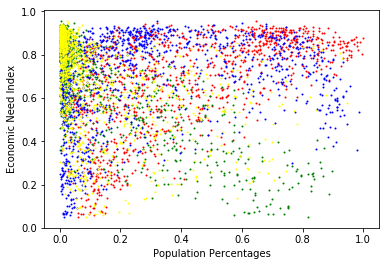

In [67]:
plt.scatter(x = 'Percent Hispanic', y = 'Economic Need Index', data = df_SQR, s = 1, c= 'R')
plt.scatter(x = 'Percent White', y = 'Economic Need Index', data = df_SQR, s = 1, c = "G")
plt.scatter(x = 'Percent Black', y = 'Economic Need Index', data = df_SQR, s = 1, c = 'B')
plt.scatter(x = 'Percent Asian', y = 'Economic Need Index', data = df_SQR, s = 1, c = 'Yellow')
plt.ylabel("Economic Need Index")
plt.xlabel("Population Percentages")
plt.show()

#### Explanation:
This scatter plot is purely to demonstrate the relationships between all races, as represented by different colors, and economic need. Economic needs being represented by the y-axis titled Economic Need Index and the x-axis titled Population Percentages which indicates the percentage of a given race at a single school.


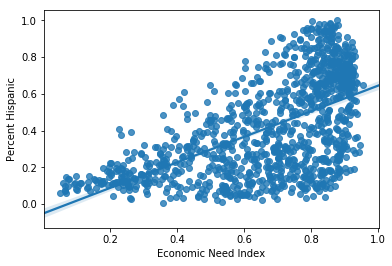

In [68]:
sns.regplot(x = 'Economic Need Index', y = 'Percent Hispanic', data = df_SQR)

#### Explanation:
The graph above shows from the fifth data set that the Hispanic populations in the schools listed tend to have a higher Economic Need Index when there is a higher percentage of Hispanics at a school.

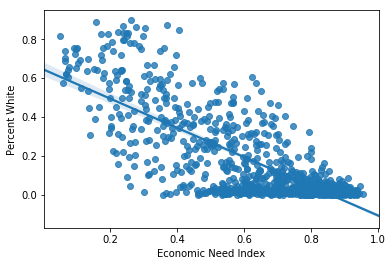

In [69]:
sns.regplot(x = 'Economic Need Index', y = 'Percent White', data = df_SQR)

#### Explanation:
The graph above shows that schools with a higher White populations will have a lower Economic Index. The relationship here appears to be opposite to that of the previous graph.
The following  graphs show similar relationships to the previous graphs. Where higher Black percentages at schools indicate a higher Economic Index. And schools with a low Asian population have a higher Economic Index.

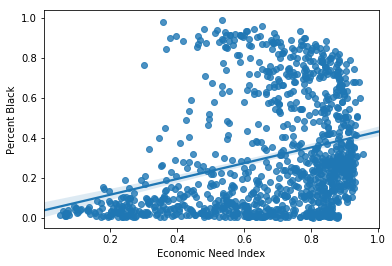

In [70]:
sns.regplot(x = 'Economic Need Index', y = 'Percent Black', data = df_SQR)

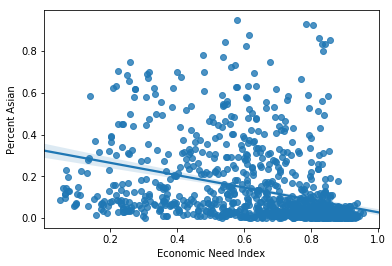

In [71]:
sns.regplot(x = 'Economic Need Index', y = 'Percent Asian', data = df_SQR)

## Relationship between Average Proficiency Scores and Economic Needs 

#### Explanation:
The following presented data is also provided from the fifth data set (or df_SQR) and will showcase the relationships in NYC schools between Average Proficieny Scores in both Math and English and Economic Needs.

The following two distributions show the average proficiency scores for 4th graders in NYC schools, for both Math and English. These graphs just serve to visualize performance before comparing it economic needs.

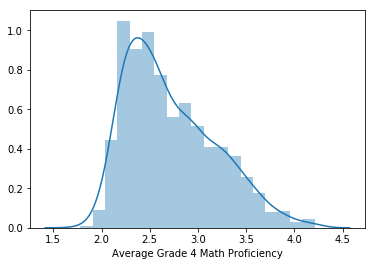

In [72]:
sns.distplot(df_SQR['Average Grade 4 Math Proficiency'])

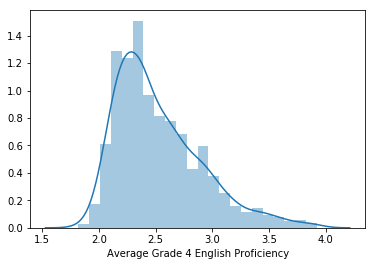

In [73]:
sns.distplot(df_SQR['Average Grade 4 English Proficiency'])

#### Explanation:
Both 'Math and English Proficiency Scores' have a negative correlation with the 'Economic Need Index'. Schools which have a higher Economic Need Index tend to reflect lower English and Math scores. The opposite can be said about schools with a lower Economic Need Index, as they display higher scores in both subjects.

### English Proficiency and Economic Need Index

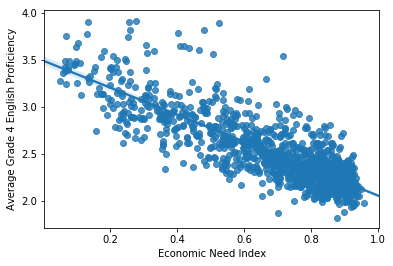

In [74]:
sns.regplot(x = 'Economic Need Index', y = 'Average Grade 4 English Proficiency', data = df_SQR)

### Math Proficiency and Economic Need Index

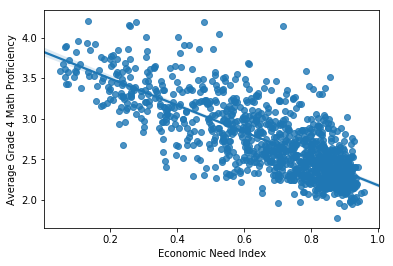

In [75]:
sns.regplot(x = 'Economic Need Index', y = 'Average Grade 4 Math Proficiency', data = df_SQR)

## Relationship between Supportive Environment and Proficiency Scores

#### Explanation:
The following data visualizations helps us observe if there is a correlation between higher scores and a supportive teaching environment.

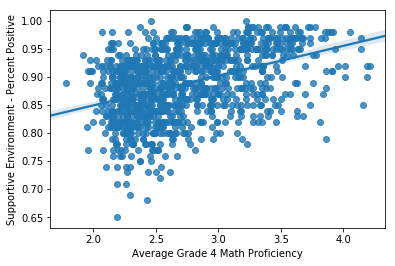

In [76]:
sns.regplot(x = 'Average Grade 4 Math Proficiency', y = 'Supportive Environment - Percent Positive', data = df_SQR)

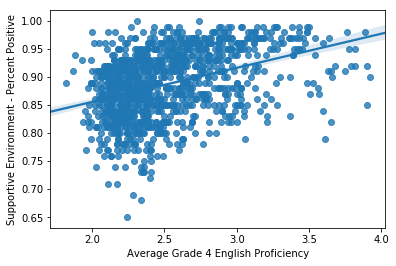

In [77]:
sns.regplot(x = 'Average Grade 4 English Proficiency', y = 'Supportive Environment - Percent Positive', data = df_SQR)

#### Explanation:
From the previous graphs, it can be noted that there is a positive correlation between a supportive environment and the students' Math and English grades. Students tend to perform better when they have support from their teachers. Teachers are able to give more attention to students in classrooms which are smaller. This can ultimately be done by hiring more teachers to lessen the amount of students per classroom, but to hire more people the schools need more funding. 

## Part 5: Study Free Time Analyses

In [79]:
sfdf = pd.read_csv('./student/student-por.csv', sep=';')
sfdf=sfdf.drop(labels=['school', 'sex', 'age', 'address','nursery', 'school', 'address','guardian', 'failures', 'health', 'romantic'], axis=1)
sfdf=sfdf.drop(labels=['reason', 'paid', 'internet', 'schoolsup'], axis=1)
sfdf=sfdf.drop(labels=['Medu', 'Fedu', 'Mjob', 'Fjob','traveltime','famsup','famrel','goout','Dalc','Walc','famsize'], axis=1)
sfdf=sfdf.drop(labels=['activities', 'higher', 'absences'], axis=1)
sfdf=sfdf.drop(labels=['Pstatus'], axis=1)
#sfdf

This dataframe essentially shows the relationship between the study and free time enjoyed by students with their
correlation to their grades, with their being 3 grade categories, denoted G1, G2, and G3 respecitvely. 

## Selecting the Correct Graph to Represent Data

In order to correctly and efficiently show data we shall look at the different forms of graph that may be used to represent the data in free time and study time, alongside their relationship with grades.

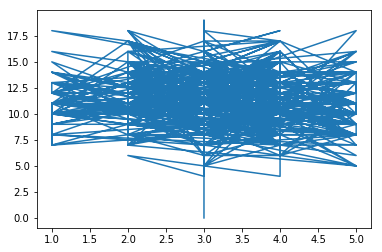

In [80]:
x = sfdf['freetime']
y = sfdf['G1']
plt.plot(x, y)
plt.show()

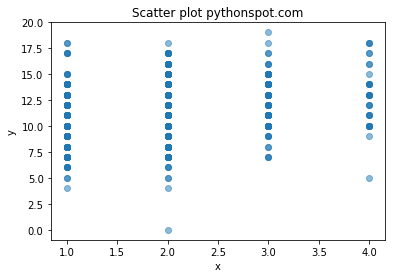

In [81]:
x = sfdf['studytime']
y = sfdf['G1']
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

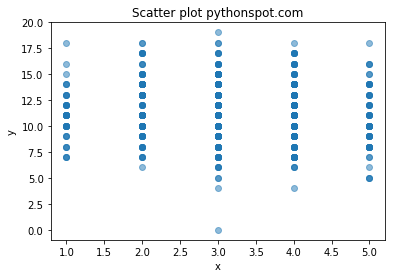

In [82]:
x = sfdf['freetime']
y = sfdf['G1']
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Based on the graphs shown we will use boxplot graphs in order to represent the relationship between free/study time and grades recieved.

## Graphs for Free Time

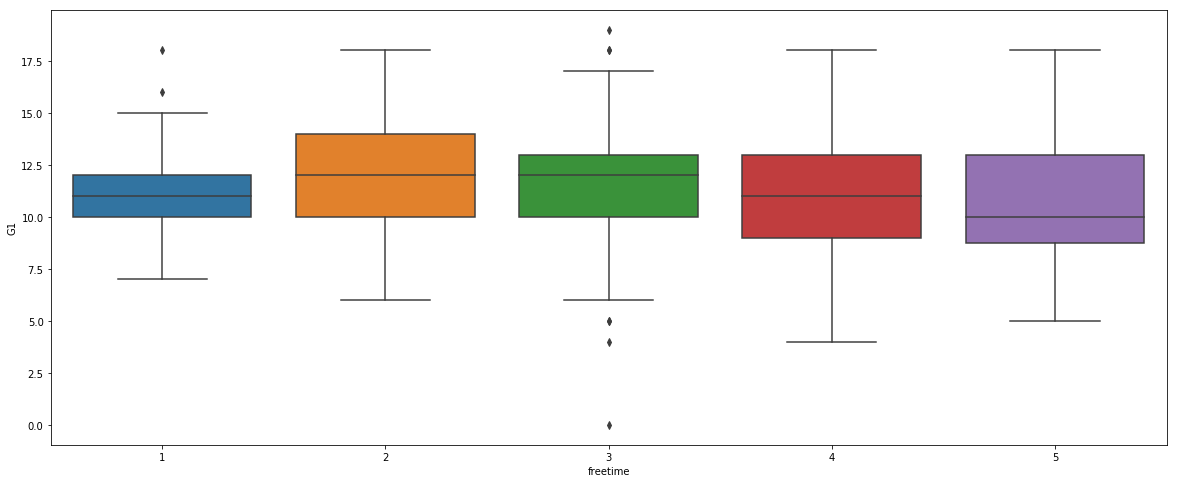

In [83]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['freetime', 'G1']], x='freetime', y='G1')

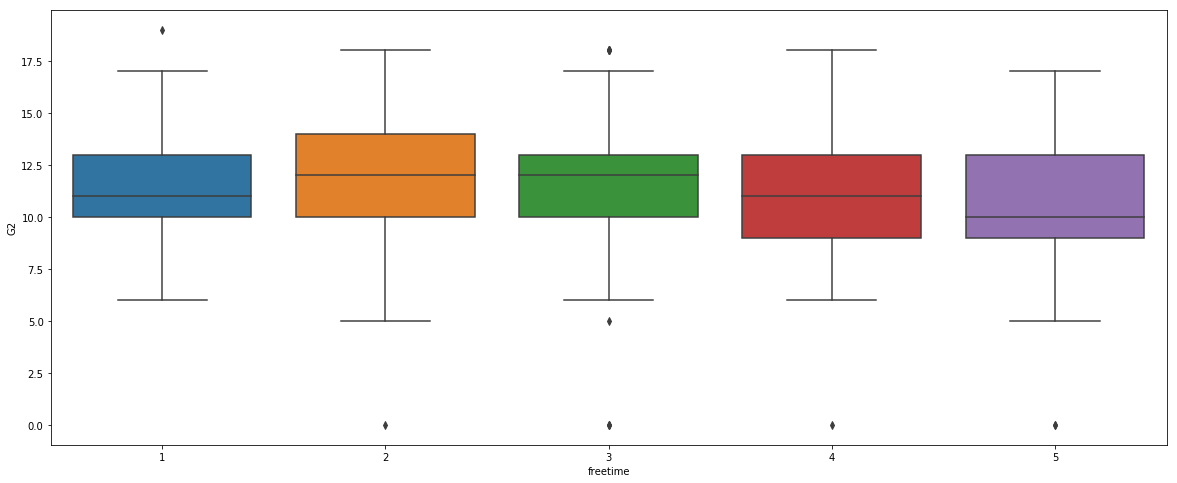

In [84]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['freetime', 'G2']], x='freetime', y='G2')

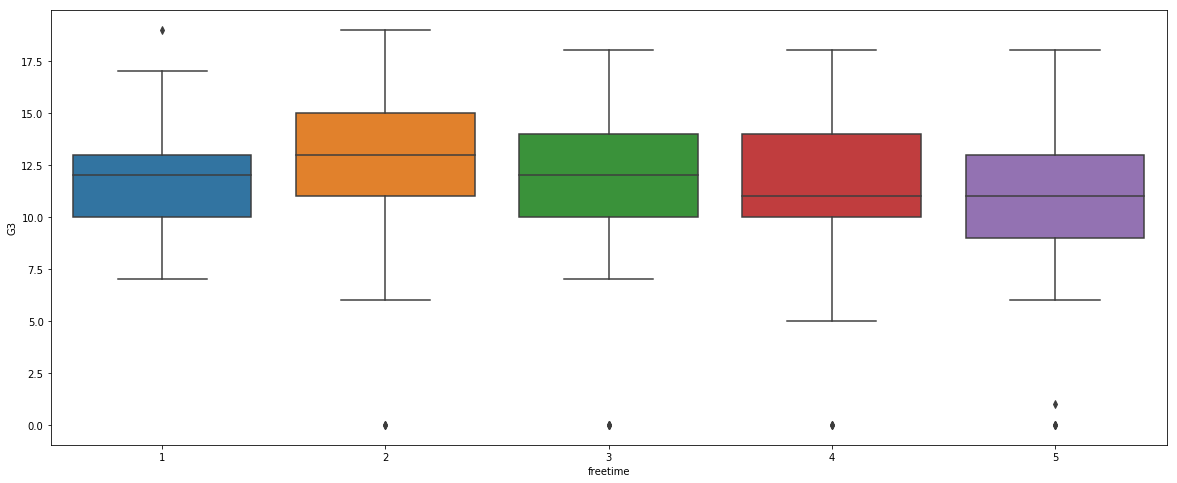

In [85]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['freetime', 'G3']], x='freetime', y='G3')

## Graphs for Study Time

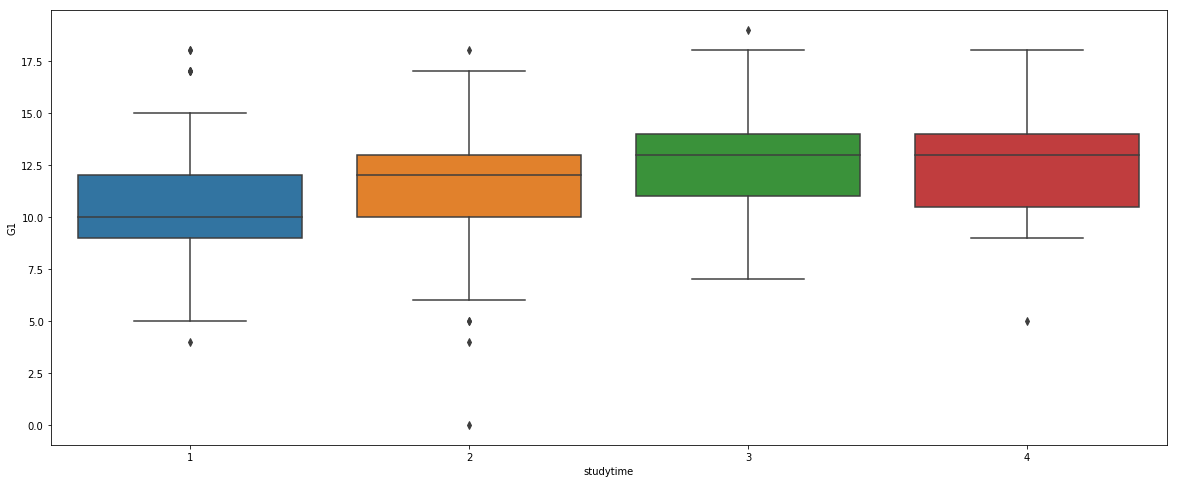

In [86]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['studytime', 'G1']], x='studytime', y='G1')

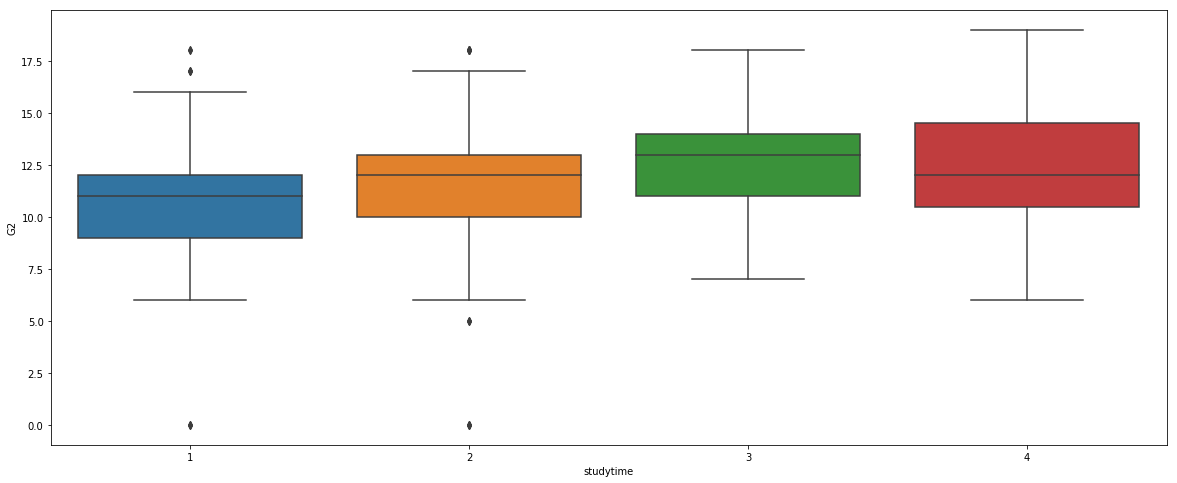

In [87]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['studytime', 'G2']], x='studytime', y='G2')

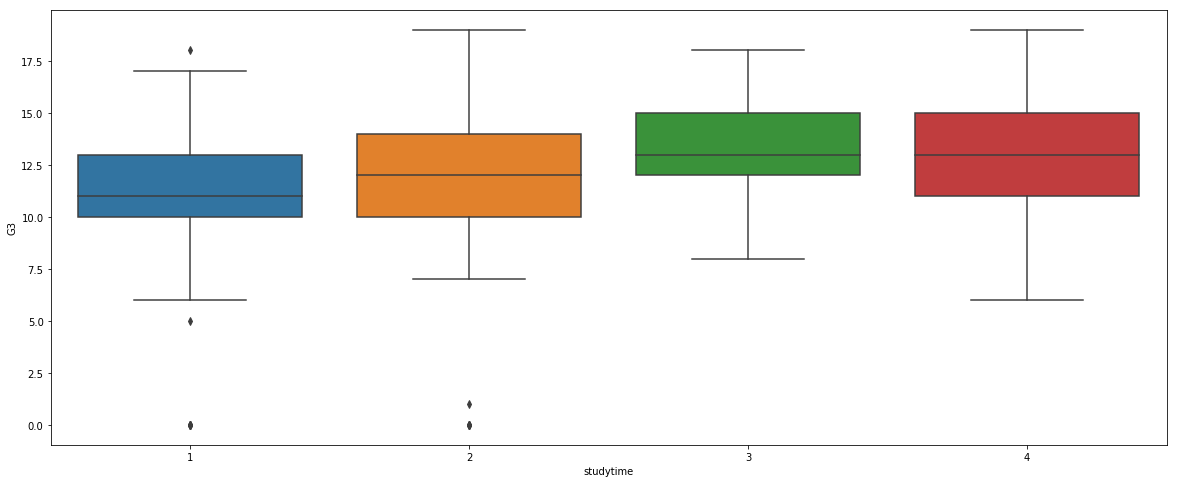

In [88]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['studytime', 'G3']], x='studytime', y='G3')

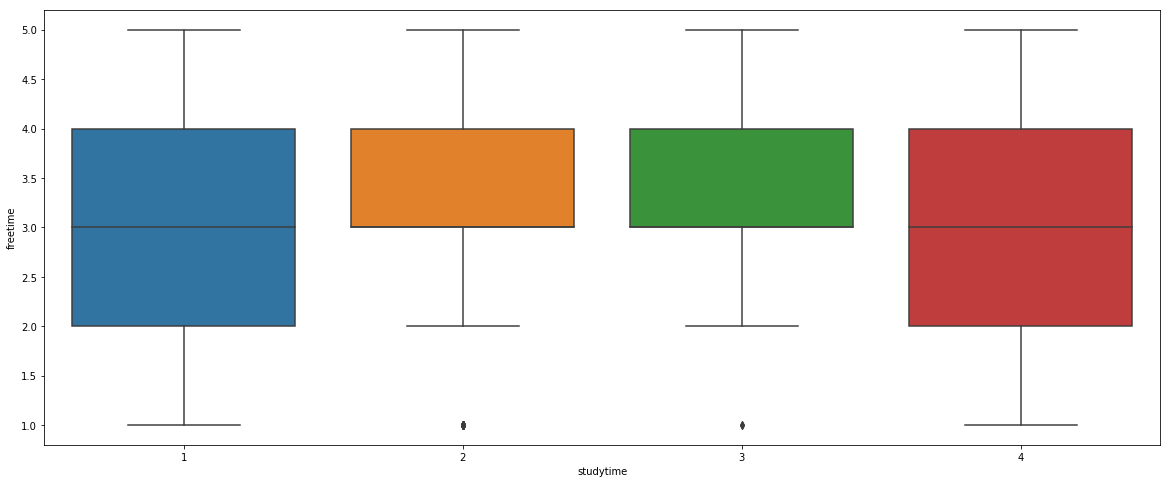

In [89]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=sfdf[['studytime', 'freetime']], x='studytime', y='freetime')

Results of the correlation between freetime and studytime on Grades reported for 3 quarters.

# The Grades are Related with the Course Subject, Math or Portuguese:
G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

We will start analyzing this set of data by first relating study time with the reported grades given in the dataset titled students.txt. In it, we see a linear trend for each of the grades reported. As the amount of study time increased, from less than 2 hours (1) all the way to 10 hours (4), it could be seen that there was a gradual increase in students grades that remained constant throughout the next 3 periods. This aligns with our hypothesis, or claim, that made in the beginning, since it was believed there should be a relationship between study time and grades. In this case the data sets do prove this, showing that with an increase in study time, there is an increase in the grades received by individual students. The relationship between study time and grades is a linear one with a small slope. One last observation is the fact that the linear relationship remained the same throughout all the 3 grading quarters.

Another observation done on this data set is on free time. In here there is a less notable relationship between free time and the resulting grades earned by students. There was a small correlation between the two data sets, however. Students who have either very little or too much free time tend to have grades that are slightly lower than those that have a balanced amount of free time. We define balanced in this case to mean around 2 to 4 hours of free time, essentially around a quarter or a fifth of the day. This supports my thesis since the students with less free time, have other responsibilities such as work or other activities, which in turn might lead to the reduced focus on school and studying, as well as resulting in the student being more tired, which all in all hurts the grades of the student. To explain the reasoning behind students receiving a slightly lower grade even though they have a higher amount of free time, consider the following. Students who report having a lot of free time can essentially be neglecting their school responsibilities, and instead use that time however they see fit. This in turn leads to the reduction of grades since there is less of a focus on school and instead use their increased free time to play video games, or to go out more often. This then proves why students with more free time tend to have lower grades. Overall this supports the hypothesis since people with balanced free time tend to get on average the average grade, not too high or not too low, with students with higher free time and less free time having a slightly lower grade.

The last analysis on this data set is the relationship between study time and free time. More or less the result was unexpected, since people with less free time had more time to study, similarly, people with more study time had more free time, and everything in the middle was more or less average. However, since our project does not deal with the relationship between free time and study time, we will limit our observations only up to this point.

# Ethics & Privacy

Some ethical considerations that need to be made note of are that the data we are utilizing for this project are from public databases. As a result, we will need to make sure that any personal information (name, date of birth, residential address) that can be used to identify an individual is removed in order to make sure that the data remains anonymous. It may also help to use data aggregation to group the data used into smaller categories, such as age ranges, in order to add to the anonymity and make our results more applicable (11-13 year olds might perform similarly to each other, but not similarly to 18-19 year olds). Finally, it would be in our best interest to mention and identify and biases in the datasets that could potentially skew our results, or be used to trace back to specific people.

While our group tried to select data sets that have the least amount of bias influencing them, it is also understood that there will always be results that will skew our results a certain way. In order to identify these biases, we read the accompanying documentation in order to see the context in which these data sets were taken in. Once the context was known we then proceeded to identify the data that would be the most helpful in our project, namely the external factors that affected student performance in academics. With this in mind, we could keep track of different data sets and then try to keep the data as impartial as possible in order to get the best results possible. 

Some unintended consequences of this analysis could be that readers think that factors we mentioned are the only important factors that affect student grades. There are still many factors that affect students’ academic performance, and this project is not a comprehensive list of them. While the most important factors were selected, it must be known that these results are from a case-by-case basis and should not be believed to be the only factors that affect student performance. As a result, readers might not understand that there are definitely more factors beyond the ones analyzed by the project. To avoid this, the project will have a disclaimer that the findings are only applicable to the factors that were talked about, and that there are still many factors that can affect students’ academic performance that were not mentioned in the project.  

In terms of ill intent our project could be used as a form of proof to support agendas that are not endorsed or supported by the project. Essentially, the findings could be used to draw false conclusions, and in order to prevent this the project holds a disclaimer that the results are only backed by the evidence and data within the project. This can prevent the unintended use of our project results.  


# Conclusion and Discussion

### Part 1: Which parental figure plays a more important role in promoting students' study activities?

From part 1 we analyzed the number of announcements viewed, discussions attended, and hand raised, compared them to which parental figure was more involved in that students' life. We found that students who's mothers played a more important role tended to check school announcements and raise their hands during class more often than those with a stronger father presence. However, the number of discussions attended remained equal between both parental figures. From this part we can deduce that there is a correlation between the presence of mother parental figure and the promotion of student study activities, though the extent of how much is unknown with the data available.

### Part 2 and 3: Analysis based on Parent Education Level and Student Academic Performance

In part 2 we wanted to determine whether or not parent education level played a part in affecting student academic performance. After analyzing our data, we found a general trend that as parental education levels rose, the average math/reading/writing students scores also increased, suggesting a correlation between parent education level and student academic performance. This was demonstrated through linear regression in reference to the scores of the 3 subjects, with the strongest correlation between students' writing score and parental education level. Furthermore, it was discovered through this method if we used linear regression to find the effect of a combination of both parent education levels, we get the following equation:

G = 0.5088 x MotherEducation + 0.2472 x FatherEducation + 9.7751.¶

The results suggest that mother's education level has a higher influence on the students' grade than father's education level (shown through the larger coefficient), which is the same as what is shown on the correlation heat map. Thus, we can conclude that parent education level does serve as a factor in determining student academic performance.

### Part 4: Economic Need, School Income and Race

For part 3 the goal was to determine if economic need, school income, and student race factored into student academic performance. First we analyzed the economic need index and income of schools, and found that there is an inverse relationship between the index and the amount of money a school receives (higher index, less money, and vice versa). More funds available leads to more resources that a student can access, including technology, teachers, tutoring sessions, and an overall better learning environment as a whole, which was reflected in student scores. Schools with a lower economic need index had a more dominant student population of Asian and White students, and better results in test scores than schools with a higher economic need index and a more dominant student population of Hispanic and Black student population.

### Part 5: Study and Free Time

In this final part, we analyzed the amount of study and free time students had and correlated that to their academic performance. We found that there exists a linear direct correlation between study hours spent and grades, with more time spent studying resulting in higher grades. Furthermore, free time was shown to be less direct in affecting academic performance, with students having too much or too little free time having lower grades than those with a "medium" amount of free time.

### Conclusion

After analyzing each other these four parts we can conclude our findings in determining what are the key factors that can influence student performance in school. Our hypothesis for this research question was as follows: 

Before analyzing the data, we hypothesize that the following factors will influence a student's performance on exams:

- 1) Parents’ support
- 2) School resources (funding)
- 3) Motivation (interest in pursuing higher education)
- 4) Participation in extracurricular activities
- 5) Socio-economic background
- 6) Demographic (in terms of location of the school)
- 7) Structure of classrooms
- 8) Romantic relationship

Based on our analysis and findings, we have found that the following factors that in fact affect student academic performance are:

- 1) Parental Figure Involvement (Father or Mother)
- 2) Parent Education Level
- 3) Economic Need
- 4) School Income
- 5) Student Race
- 6) Study Time

However, these factors were deduced from the chosen datasets used for this research project. While these results show a strong correlation between the above factors and student academic performance, this is on a case-by-case basis and can be affected by many other factors.
